# Assignment 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define functions for plotting
def convert(img):
    '''change image color to "RGB" for plt.plot()'''
    if len(img.shape)==2: # change grey image to color image
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif len(img.shape)==3: # change color image from "BRG" to "RGB"
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show(i, size=(6,10)):
    i = convert(i)
    plt.figure(figsize=size)
    plt.imshow(i)
    plt.show()
    
def show2(image_list, titles, size=(10,5)):
    images = [convert(i) for i in image_list]
    plt.figure(figsize=size)
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])

def show3(image_list, titles, size=(15,5)):
    images = [convert(i) for i in image_list]
    plt.figure(figsize=size)
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
    
def show22(image_list, titles, size=(10,14)):    
    images = [convert(i) for i in image_list]
    plt.figure(figsize=size)
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])

In [3]:
# read in image and preprocess
filename = 'image.jpg'
I = cv2.imread(filename)
I_blur = cv2.GaussianBlur(I, ksize=(3,3), sigmaX=1)
I_gray = cv2.cvtColor(I_blur, cv2.COLOR_RGB2GRAY)

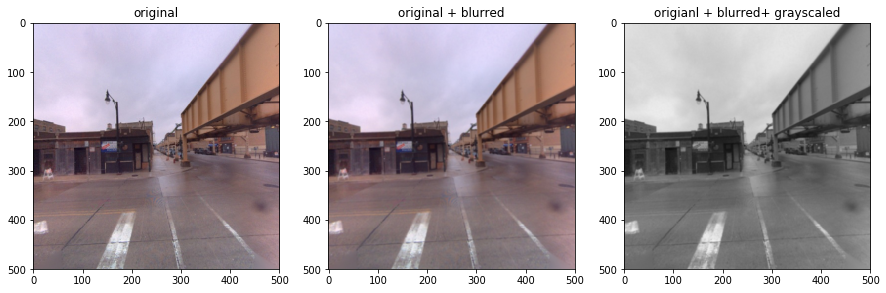

In [4]:
image_list = [I, I_blur, I_gray]
titles = ['original', 'original + blurred', 'origianl + blurred'+'+ grayscaled']
show3(image_list, titles, size=(15,5))

In [5]:
# binary thresholding (choose 1 from the following 2)
I_thresh_fixed = cv2.threshold(I_gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)[1]
I_thresh_adapt_mean = cv2.adaptiveThreshold(I_gray, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                                       thresholdType=cv2.THRESH_BINARY_INV, blockSize=33, C=2)
I_thresh_adapt_gauss = cv2.adaptiveThreshold(I_gray, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       thresholdType=cv2.THRESH_BINARY_INV, blockSize=61, C=1)

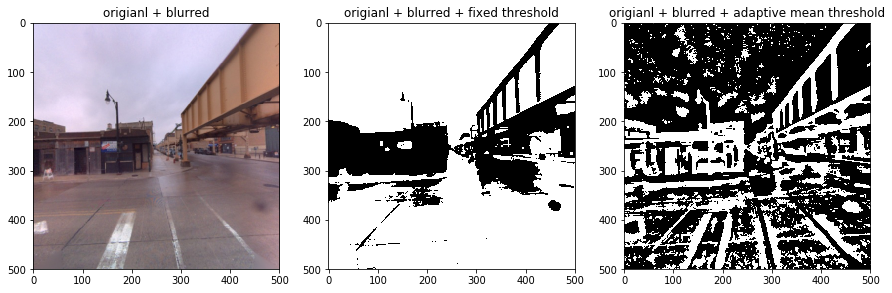

In [6]:
# compare with I_thresh_adapt_mean
image_list = [I, I_thresh_fixed, I_thresh_adapt_mean]
titles = ['origianl + blurred', 'origianl + blurred + fixed threshold', 'origianl + blurred + adaptive mean threshold']
show3(image_list, titles, size=(15,5))

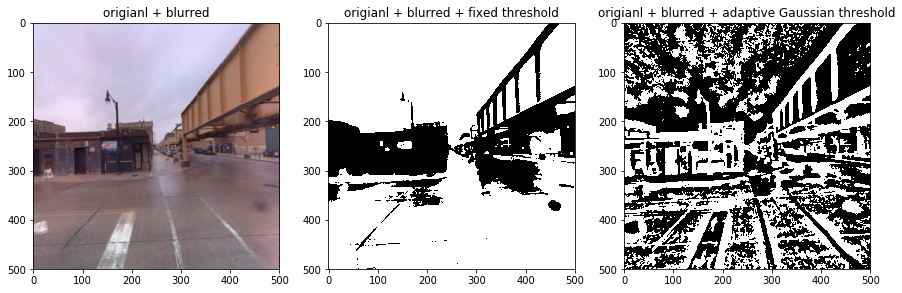

In [7]:
# compare with I_thresh_adapt_gauss
image_list = [I, I_thresh_fixed, I_thresh_adapt_gauss]
titles = ['origianl + blurred', 'origianl + blurred + fixed threshold', 'origianl + blurred + adaptive Gaussian threshold']
show3(image_list, titles, size=(15,5))

In [8]:
# detect edges
I_edge_thresh_fixed = cv2.Canny(I_thresh_fixed, threshold1=75, threshold2=100, L2gradient=True) 
I_edge_thresh_adapt_mean = cv2.Canny(I_thresh_adapt_mean, threshold1=75, threshold2=100, L2gradient=True) 
I_edge_thresh_adapt_gauss = cv2.Canny(I_thresh_adapt_gauss, threshold1=75, threshold2=100, L2gradient=True) 

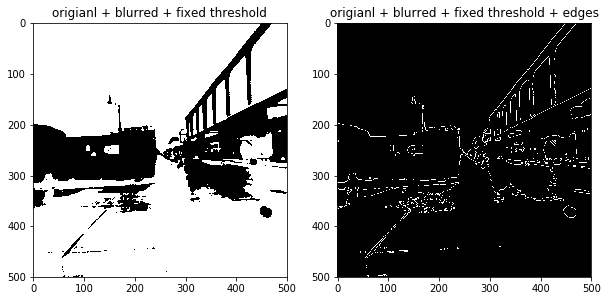

In [9]:
image_list = [I_thresh_fixed, I_edge_thresh_fixed]
titles = ['origianl + blurred + fixed threshold', 'origianl + blurred + fixed threshold + edges']
show2(image_list, titles, size=(10,5))
# show2(I_thresh_fixed, I_edge_thresh_adapt_mean, size=(10,5))
# show2(I_thresh_fixed, I_edge_thresh_adapt_gauss, size=(10,5))

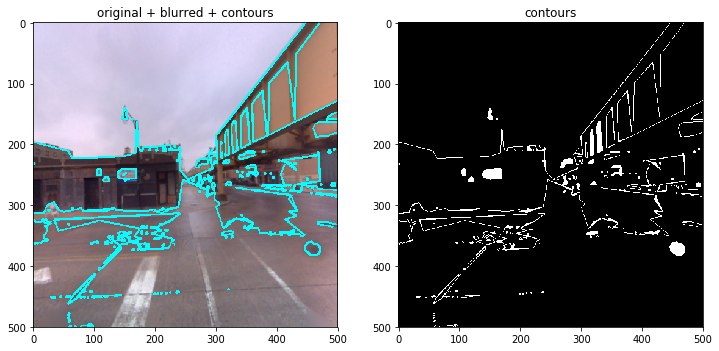

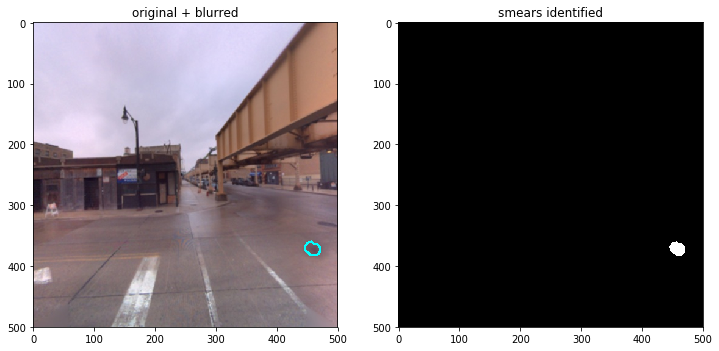

In [10]:
# find contours from the edge image
contours_detected, hierarchy = cv2.findContours(I_edge_thresh_fixed, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)

# define images to plot later
I_substrate = I.copy()
I_with_contours = I.copy()
mask_substrate = np.zeros((500, 500, 3), np.uint8)
mask_with_contours = np.zeros((500, 500, 3), np.uint8)     

for contour in contours_detected:
    # calculate a contour perimeter
    contour_perimeter = cv2.arcLength(curve=contour, closed=True)
    # approximate a contour shape by Douglas-Peucker algorithm
    region_edge = cv2.approxPolyDP(curve=contour, epsilon=0.01*contour_perimeter, closed=True)

    def appropriate_size(contour):
        (x, y), radius = cv2.minEnclosingCircle(contour)
        criteria_1 = abs(cv2.contourArea(contour) - (np.pi*(radius**2))) < 200
        criteria_2 = cv2.contourArea(contour) > 200
        return criteria_1 and criteria_2
    
    # draw all conntours
    cv2.drawContours(I_with_contours, contours=[region_edge], contourIdx=-1, color=(255,255,0), thickness=2)
    cv2.drawContours(mask_with_contours, contours=[region_edge], contourIdx=-1, color=(255,255,255), thickness=-1)
    
    # draw contours with appropriate size only
    if appropriate_size(contour):
        cv2.drawContours(I_substrate, contours=[region_edge], contourIdx=-1, color=(255,255,0), thickness=2)
        cv2.drawContours(mask_substrate, contours=[region_edge], contourIdx=-1, color=(255,255,255), thickness=-1)
        
show2([I_with_contours, mask_with_contours], ['original + blurred + contours', 'contours'], size=(12,6))
show2([I_substrate, mask_substrate], ['original + blurred', 'smears identified'], size=(12,6))